In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

<b><b>Distribution of Target Variable</b></b>

<AxesSubplot:xlabel='class', ylabel='count'>

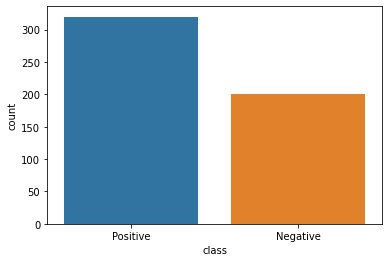

In [6]:
import seaborn as sns
sns.countplot(df['class'],data=df)

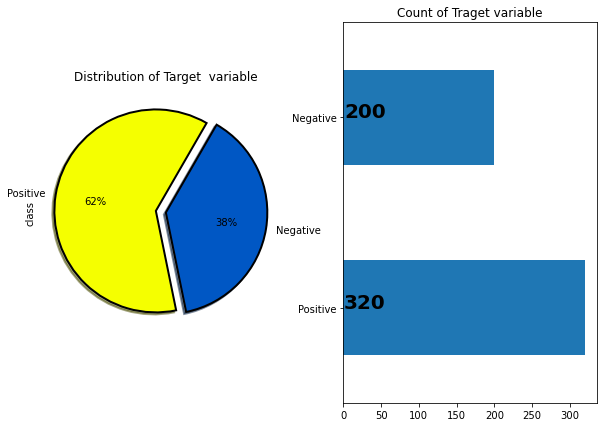

In [7]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(10,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

<b>Distribution of Gender</b>

<AxesSubplot:xlabel='Gender', ylabel='count'>

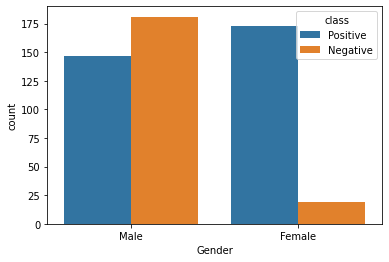

In [8]:
import seaborn as sns
sns.countplot(df['Gender'],hue=df['class'], data=df)

In [9]:
plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


<b>Distribution of Polyuria</b>

In [10]:
plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


<b>Distribution of Polydipsia</b>

In [11]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


<b>Distribution of sudden weight loss</b>

In [12]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


<b>Distribution of Polyphagia</b>

In [13]:
plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


<b>Distribution of genital thrush</b>

In [14]:
plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


<b>Distribution of Visual Blurring</b>

In [15]:
plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


<b>Itching</b>

In [16]:
plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


<b>Irritability</b>

In [17]:
plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


<b>Delayed Healing</b>

In [18]:
plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


<b>Partial Paresis</b>

In [19]:
plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


<b>Muscle Stiffness</b>

In [20]:
plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


<b>Alopecia</b>

In [21]:
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


<b>Obesity</b>

In [22]:
plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


## <b>Data pre-processing</b>

In [23]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [24]:
X= df.drop(['class'],axis=1)
y=df['class']

In [25]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [26]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [27]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


<b>Correlation</b>

In [28]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [112]:
# #Correlation with Response Variable class

# X.corrwith(y).plot.bar(
#         figsize = (15, 6), title = "Correlation with Diabetes", fontsize = 12,
#         rot = 90, grid = True,color=('#48e870'))

In [86]:
import plotly.express as px
fig = px.bar(X.corrwith(y),color = 'value')
fig.show()

<b>Train Test Split</b>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [33]:
## checking distribution of traget variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in test set
1    64
0    40
Name: class, dtype: int64


<b>Data Normalization</b>

In [34]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [35]:
X_train.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0
224,0.702703,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0
148,0.378378,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
73,0.297297,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0
507,0.594595,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
293,0.500000,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0


## <b><b>Model Building</b></b>

   <b><b>Decision tree</b></b>

In [37]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Decision tree classifier 

clf= DecisionTreeClassifier(random_state = 100)

#Training model

clf.fit(X_train, y_train)


Y_pred=clf.predict(X_test)



print(Y_pred)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, Y_pred))


[0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1]
Accuracy: 0.9711538461538461


In [41]:
y_predict_r = clf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

results_d = pd.DataFrame([['Decession Tree',acc,prec,rec,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC'])
results_d

,Model,Accuracy,Precision,Recall,ROC
0,Decession Tree,0.971154,1.0,0.953125,0.976562


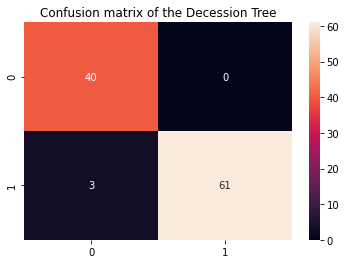

In [130]:
cm_clf = confusion_matrix(y_test, y_predict_clf)
plt.title('Confusion matrix of the Decession Tree')
sns.heatmap(cm_clf,annot=True,fmt="d")
plt.show()

<b><b>KNN</b></b>

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test,pred)
acc

0.9519230769230769

In [49]:
#from sklearn import model_selection

#kfold = model_selection.KFold(n_splits=10, random_state=7)
#scoring = 'accuracy'

#acc_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
#acc_knn

In [47]:
y_predict_r = knn.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

results_1 = pd.DataFrame([['KNN',acc,prec,rec,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC'])
results_1

,Model,Accuracy,Precision,Recall,ROC
0,KNN,0.951923,1.0,0.921875,0.960938


In [56]:
results_2 = results_d.append(results_1, ignore_index = True)
#results_2

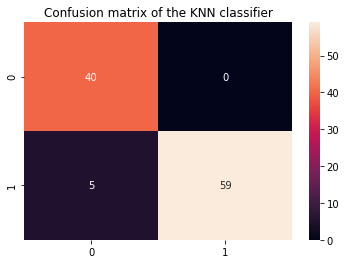

In [57]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
plt.title('Confusion matrix of the KNN classifier')
sns.heatmap(cm_knn,annot=True,fmt="d")
plt.show()

<b><b> Logistic Regression </b></b>

In [58]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [60]:
# from sklearn import model_selection

# kfold = model_selection.KFold(n_splits=10, random_state=7)
# scoring = 'accuracy'

# acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
# acc_logi.mean()

In [65]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results_l = pd.DataFrame([['Logistic Regression',acc,prec,rec,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Recall','ROC'])
results_l

,Model,Accuracy,Precision,Recall,ROC
0,Logistic Regression,0.971154,0.984127,0.96875,0.971875


In [66]:
results_3 = results_2.append(results_l, ignore_index = True)
#results_3

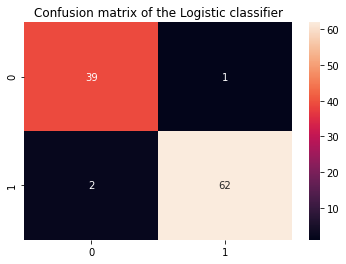

In [67]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

<b> Random forest</b>

In [68]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
# kfold = model_selection.KFold(n_splits=10, random_state=7)
# scoring = 'accuracy'

# acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
# acc_rf.mean()

In [70]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

results_r = pd.DataFrame([['Random Forest',acc,prec,rec,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'ROC'])
results_r
#results_r = results.append(model_results, ignore_index = True)
#results_r

,Model,Accuracy,Precision,Recall,ROC
0,Random Forest,0.980769,1.0,0.96875,0.984375


In [71]:
results = results_3.append(results_r, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,ROC
0,Decession Tree,0.971154,1.000000,0.953125,0.976562
1,KNN,0.951923,1.000000,0.921875,0.960938
2,Logistic Regression,0.971154,0.984127,0.968750,0.971875
3,Random Forest,0.980769,1.000000,0.968750,0.984375


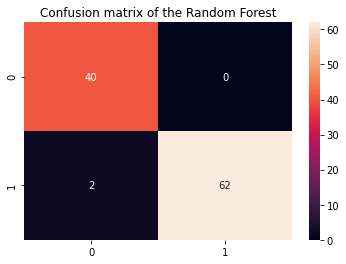

In [72]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [73]:
y_predict_r = rf.predict(X_test)
y_predict_r

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)